In [ ]:
# C:\images\폐사진
# 폐사진들을 숫자로 변환한 리스트 값을 인공 신경망에 넣기 위해 
# 리스트 객체에 저장 하려고 한다. 파일을 읽어와서 숫자로 변환하자 .
#  이미지  => numpy 모듈의  array  변환  
import numpy as np  
import cv2 
import os   #  디렉토리 탐색을 한 후 파일을 추출하기 위한 모듈
import re   # 데이터 정제 

In [ ]:
test_images = 'c:\\images'

#이미지 파일을 list 객체에 담아 정렬할 수 있는 함수 
def img_load(path):
    file_list = os.listdir(path)#해당 디렉토리에 파일을 추출
    file_name=[] 
    #파일의 이름을 검증해서 list 객체에 저장 후 정렬
    for i in file_list:  
        a = re.sub('[^0-9]','',i) #i의 값 중에서 숫자가 아니면 ''로 변경 null변경 
        file_name.append(int(a))
        file_name.sort()
   
    file_res =[]  # 파일 목록을 저장할 변수  
    for  k in file_name:
        file_res.append('c:\\images\\'+ str(k) + '.png')  #c:\\images\\1.png
        
    image =[]
    for  h in file_res :
        img = cv2.imread(h) #이미지파일을 읽어서 숫자 ndarray 변환
        image.append(img)

    #return image  
    return np.array(image)          


In [ ]:
print(img_load(test_images)) # test_images 디렉토리에 있는 모든 파일을 배열로 리턴

* 이미지 프로세싱에서 가장 많이 사용하는 기법
0~255 <127>     127보다 작으면 모두 0으로, 127보다 크면 모드 255값으로 처리  

임계값 처리  :  cv2.threshold(src, thresh, maxval, type[, dst])

cv2.threshold(대상이미지, 임계값, 임계값보다 큰값 , 임계값적용타입)

<<enum cv::ThresholdTypes>>
Python: cv.THRESH_BINARY    :  픽셀값src(x,y) thresh 값보다 크면  value, 작으면  0 
Python: cv.THRESH_BINARY_INV  :  픽셀값src(x,y) thresh 값보다 크면  0, 작으면  value 
Python: cv.THRESH_TRUNC  : 픽셀값src(x,y) thresh 값보다 크면  thresh, 작으면 픽셀값src(x,y) 
Python: cv.THRESH_TOZERO  : 픽셀값src(x,y) thresh 값보다 크면  픽셀값src(x,y) , 작으면  0 
Python: cv.THRESH_TOZERO_INV  : 픽셀값src(x,y) thresh 값보다 크면 0, 작으면 픽셀값 src(x,y)


In [ ]:
#1. 임계값 지정하기전 이미지를 흑백으로 읽어 오자. 
image = cv2.imread('c:\\myImg\\Lenna.png')
#cv2.imwrite('c:\\myImg\\temp\\G01.png',image)

th, im_th =cv2.threshold(image,127,255, cv2.THRESH_BINARY)
print(th)

cv2.imwrite('c:\\myImg\\temp\\G02.png',im_th)

# 임계값 보다 큰값은 원래의 상태로 작은값은 0으로 지정해서 이미지를 확인 하자. 

th, im_th =cv2.threshold(image,127,255, cv2.THRESH_TOZERO)
print(th)

cv2.imwrite('c:\\myImg\\temp\\G03.png',im_th)




In [ ]:
import cv2
#1. 임계값 지정하기전 이미지를 흑백으로 읽어 오자. 
image = cv2.imread('c:\\myImg\\Lenna.png',0)
ret ,  img_thresh  =  cv2 . threshold ( image ,  100 ,  255 ,  cv2 . THRESH_BINARY )

cv2 . imshow ( "img_th" ,  img_thresh ) 
cv2 . waitKey() 
cv2 . destroyAllWindows()

In [ ]:
import cv2
#임계값 자동으로 처리 cv2.threshold  cv2.THRESH_OTSU
image = cv2.imread('c:\\myImg\\Lenna.png',0)  

ret2 ,  img_otsu  =  cv2 . threshold ( image ,  0 ,  255 ,  cv2.THRESH_OTSU )
print ( "ret2 : {}" . format ( ret2 ))
cv2 . imshow ( "otsu" ,  img_otsu ) 
cv2 . waitKey () 
cv2 . destroyAllWindows()

cv2.imread('c:\\myImg\\Lenna.png',flags)
-1 : 변화없이
0  : 그레이
1  : 색상
2  : 임의의 깊이 
3  : 임의의 색상

day03
1. 임계값처리
2. 이미지 처리   _ 흑백, 지정 범위 색상 추출[HSV]  , 가장자리, 크기조정 , 이미지 히스토그램 시각화 
3. 이미지 처리   _ 감마처리 , 평행이동, 회전 
4. 이미지 처리   - 회선 방법  
5. 특정 픽셀   - ORB 특징 픽셀 추출  , 매칭, 거리계산  


In [ ]:
# 2. 지정범위색상 추출  
#색상(Hue) 0~360, 채도(Saturation) 원의 중심에서 0~100 , 명도(Value) 높이로 0~100
# OpenCV   H [0~179] ,SV [ 0~255]

import cv2
import numpy as np
# 1)대상이미지      : imread(), cvtColor()
img = cv2.imread('c:\\myImg\\Lenna.png')  
hsv = cv2.cvtColor(img,  cv2.COLOR_BGR2HSV) 

#2) -> 추출색상 범위를 지정한 이미지 mask :  cv2.inRange(대상, 시작범위, 마지막범위)
start_color = np.array([20,50,50])
end_color = np.array([ 255,255,255])
img_mask =cv2.inRange(hsv,start_color,end_color)

#3) -> 원본이미지와 mask이미지를 2진으로 비교 : cv2.bitwise_and(대상, 대상, mask )
img_color  =  cv2.bitwise_and(img, img, mask = img_mask )
cv2.imwrite("c:\\myImg\\temp\HSV_mask.png", img_color )


In [ ]:
#2.가장자리  
# Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
# Canny(image, threshold1[최소], threshold2[최대], edges 저장변수[, 
 #       apertureSize[그레디언트값 기본 3], L2gradient]]]) -> edges
   # L2gradient =False   dI/dx|+|dI/dy|   
  # L2gradient =True   sqrt{(dI/dx)^2 + (dI/dy)^2}  
import cv2
import numpy as np
# 1)대상이미지   흑백이미지    : imread()
img = cv2.imread('c:\\myImg\\Lenna.png', 0)     

#2) edges 검색 
c_img    =  cv2.Canny(img,50,110)
cv2.imwrite("c:\\myImg\\temp\Canny.png", c_img )
    
    

In [ ]:
#크기조정  resize() 
import cv2
import numpy as np
img = cv2.imread('c:\\myImg\\Lenna.png', 1)     
w,h  =60,60
img_res = cv2.resize(img,(w,h))

cv2.imwrite("c:\\myImg\\temp\Resize.png", img_res )

In [ ]:
#2. 이미지 히스토그램 시각화   cv2.calcHist()
#이미지에서 B,G,R  를 가진 화소로 구성된것을 그래프로 표현   
# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c:\\myImg\\apple.jpg')  
color  = ('b','g','r')

for i, col in enumerate( color):  
    histr  = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])    
plt.show()

In [ ]:
#임의의 이미지를 다운로드 받아  흑백으로 추출하고, 가장자리 추출해서 저장해보자 
import  cv2
#상수정의 
o_w_n ="org"
g_w_n="gray"
c_w_n="canny"

o_f_n = "c:\\myImg\\OIP.jpg"
g_f_n= "c:\\myImg\\OIPG.jpg"
c_f_n="c:\\myImg\\OIPC.jpg"

#원본이미지 로드
org_img= cv2.imread(o_f_n,cv2.IMREAD_UNCHANGED)

#그레이스케일로 변환하면서 로드
gray_img = cv2.imread(o_f_n, cv2.cv2.IMREAD_GRAYSCALE)

# 에지 추출 
canny_img = cv2.Canny(gray_img,50,100)

#프레임 창에 표시
cv2.namedWindow(o_w_n)
cv2.namedWindow(g_w_n)
cv2.namedWindow(c_w_n)

#제목과 추출 이미지 표시
cv2.imshow(o_w_n, org_img  )
cv2.imshow(g_w_n, gray_img  )
cv2.imshow(c_w_n, canny_img  )

#파일에 저장 
cv2.imwrite(g_f_n,gray_img)
cv2.imwrite(c_f_n,canny_img)

#종료
cv2.waitKey(0) # 무한기다림  
cv2.destroyAllWindows()




In [5]:
#3. 이미지 처리   _ 감마처리 : 이미지 밝기를 변경  
#  y= 255*(x / 255) ^ (1/r)     r의 값이 1보다  크면 밝다 , 1보다 작으면 어둡다  
# LUT(src, lut[, dst]) -> dst 
# https://ko.wikipedia.org/wiki/YCbCr 

import cv2
import numpy  as np 
#감마 테이블을 만들어 이미지 적용해보자.  
r=1.8
lookup_table =  np.zeros(   (256,1),  dtype ='uint8') 

for  i  in range(256):
      lookup_table[i][0]= 255 *pow( float(i)/ 255,    1.0/r)


o_f_n = "c:\\myImg\\road2.jpg"
#파일 읽어서 감마처리 후 파일 저장
img_src = cv2.imread(o_f_n, 1)
img_gamma = cv2.LUT(img_src ,lookup_table )

cv2.imwrite('c:\\myImg\\road2_gamma.jpg', img_gamma)





True

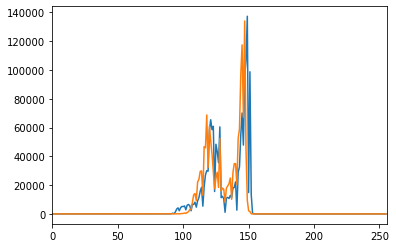

In [10]:
# YCbCr( YCC )를 이용해 보자 cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
import cv2
import numpy  as np 
import pylab as plt

o_img = cv2.imread('c:\\myImg\\road1.png',1)
lut_img =  cv2.imread('c:\\myImg\\road1_gamma.png',1)
#1. 이미지를 YCC로 변환  
o_ycc = cv2.cvtColor(o_img, cv2.COLOR_BGR2YCR_CB)
lut_ycc = cv2.cvtColor(lut_img, cv2.COLOR_BGR2YCR_CB)

#2. Y의 히스토그램 비교 
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 

#3. Cb, Cr값 비교 
h_o  =cv2.calcHist([o_ycc],[2] , None,[256],[0,256])
h_lut =cv2.calcHist([lut_ycc],[2],None,[256],[0,256])

plt.plot(h_o)
plt.plot(h_lut)
plt.xlim([0,256])
plt.show()

#channels 밝기 y를 지정하고 마스크없이 크기를 256으로 범위를 지정 
#h_o  =cv2.calcHist([o_ycc],[0] , None,[256],[0,256])
#h_lut =cv2.calcHist([lut_ycc],[0],None,[256],[0,256])

#channels 밝기 1를 지정하고 마스크없이 크기를 256으로 범위를 지정 Cr
#h_o  =cv2.calcHist([o_ycc],[1] , None,[256],[0,256])
#h_lut =cv2.calcHist([lut_ycc],[1],None,[256],[0,256])

#channels 밝기 2를 지정하고 마스크없이 크기를 256으로 범위를 지정 Cb
#h_o  =cv2.calcHist([o_ycc],[2] , None,[256],[0,256])
#h_lut =cv2.calcHist([lut_ycc],[2],None,[256],[0,256])


 이미지 처리   _
 1. 아핀변환(2*3)  :  affine transformation 평행 사변형으로 변환 
      1) 평행이동, 회전  =  Euclidean space 
      2)평행이동, 회전  + 확대 , 축소   = similarity transformation
      
 2. 투영 변환(3*3)  : projective transformation      사각형으로 변환 (보정작업)
       1) 투시 변환 perspective transformation  
       2) 호모 그래피 변환(평면 투영 변환)  homograpyh transformation   

In [13]:
#cv2. getRotationMatrix2D(center, angle, scale) -> retval
#cv2. warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> ds
# case 1  : getRotationMatrix2D
import cv2
import numpy as np
import math

img = cv2.imread('c:\\myImg\\Lenna.png') 
h,w,c = img.shape
print(h,w,c)

mat  = cv2.getRotationMatrix2D( (w/2,h/2), 45, 0.5  )
print(mat)

#affine_img = cv2.warpAffine(img,mat,(w,h),borderValue=(0,128,255) )#BRG
#img02 = cv2.imread('c:\\myImg\\apple.jpg') 
#dst =img02 // 4
#affine_img = cv2.warpAffine(img,mat,(w,h),borderMode=cv2.BORDER_TRANSPARENT, dst=dst )#BRG

#affine_img = cv2.warpAffine(img,mat,(w,h),borderMode=cv2.BORDER_REPLICATE )#BRG
affine_img = cv2.warpAffine(img,mat,(w,h),borderMode = cv2 . BORDER_WRAP  )#BRG
cv2.imshow("res", affine_img)
cv2 . waitKey ()
cv2 . destroyAllWindows ()


256 256 3
[[  0.35355339   0.35355339  37.49033201]
 [ -0.35355339   0.35355339 128.        ]]


In [5]:
#cv2. getRotationMatrix2D(center, angle, scale) -> retval
#cv2. warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> ds
'''
flags
cv2.INTER_NEAREST:
cv2.INTER_LINEAR: 
cv2.INTER_CUBIC: 
cv2.INTER_LANCZOS4: 

'''
borderMode
cv2.BORDER_CONSTANT
cv2.BORDER_REPLICATE 
cv2.BORDER_REFLECT
cv2.BORDER_WRAP
cv2.BORDER_REFLECT_101: 
cv2.BORDER_TRANSPARENT
'''
# case 2 : np.float32()    -> 평행 이동만  
import cv2
import numpy as np
import math

img = cv2.imread('c:\\myImg\\Lenna.png') 
h,w = img.shape[:2]

dx, dy = 30,30 

mat = np.float32([   [1,0,dx],
                     [0,1,dy]])

affine_img = cv2.warpAffine(img,mat,(w,h))

cv2.imshow("res", affine_img)

cv2 . waitKey()
cv2 . destroyAllWindows()


2. 투영 변환(3*3)   

cv2. getPerspectiveTransform(src, dst[, solveMethod]) -> retval
 cv2.warpPerspective(src, M (float), dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst

과제  1. api를 확인한 화면 캡처1 
과제  2. 튜터리얼의 소스코드를 실행 후 캡처2 
과제  3. 주어진 소스코드를 가지고  ____________을 채워보자.  





